CARA 1

Manual Code - Tidak menggunakan library IPYNB

In [ ]:
import pandas as pd 
import numpy as np
import pprint
import pydot

In [ ]:
# read file dari training data 
df=pd.read_excel('1_Manual Code_Train Dataset.xlsx')
df

,Index,Age Cluster,ChestPainType,NEW RestingBP,NEW Triglycerides,NEW FastingBS,RestingECG,NEW MaxHR,ExerciseAngina,NEW Oldpeak,ST_Slope,HeartDisease
0,832,51-60,NAP,Normal,High,Normal,Normal,Normal,Y,Low,Up,0
1,591,51-60,ASY,Normal,High,Normal,ST,Low,N,Low,Up,0
2,821,51-60,NAP,Normal,High,Normal,Normal,Normal,N,Low,Up,0
3,767,51-60,NAP,Normal,High,Normal,LVH,Normal,N,Low,Up,0
4,807,51-60,ATA,Normal,High,Normal,Normal,Normal,N,Low,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
601,915,51-60,ASY,High,Normal,Normal,Normal,Low,Y,Low,Flat,1
602,149,51-60,ASY,High,Very High,Diabetes,Normal,Low,Y,Low,Flat,1
603,571,61-70,ASY,High,Normal,Diabetes,Normal,Low,Y,Normal,Flat,1
604,85,61-70,ASY,High,Normal,Normal,Normal,Low,Y,Low,Flat,1


In [ ]:
# drop kolom yang tidak diperlukan, dalam hal ini adalah umur
df.drop(['Index'], axis=1, inplace=True)
df

,Age Cluster,ChestPainType,NEW RestingBP,NEW Triglycerides,NEW FastingBS,RestingECG,NEW MaxHR,ExerciseAngina,NEW Oldpeak,ST_Slope,HeartDisease
0,51-60,NAP,Normal,High,Normal,Normal,Normal,Y,Low,Up,0
1,51-60,ASY,Normal,High,Normal,ST,Low,N,Low,Up,0
2,51-60,NAP,Normal,High,Normal,Normal,Normal,N,Low,Up,0
3,51-60,NAP,Normal,High,Normal,LVH,Normal,N,Low,Up,0
4,51-60,ATA,Normal,High,Normal,Normal,Normal,N,Low,Up,0
...,...,...,...,...,...,...,...,...,...,...,...
601,51-60,ASY,High,Normal,Normal,Normal,Low,Y,Low,Flat,1
602,51-60,ASY,High,Very High,Diabetes,Normal,Low,Y,Low,Flat,1
603,61-70,ASY,High,Normal,Diabetes,Normal,Low,Y,Normal,Flat,1
604,61-70,ASY,High,Normal,Normal,Normal,Low,Y,Low,Flat,1


In [ ]:
# ===== MENGHITUNG ENTROPY TOTAL =====
def calculateEntropy(dataset):
  heartDisease = dataset.keys()[-1] # -> ambil kolom paling akhir, yaitu kolom Heart Disease
  values = dataset[heartDisease].unique() #ambil value -> hasilnya: [0,1] sesuai dengan unique value di dataset
  entropy = 0
  #hitung entropy
  for i in values: # -> iterasi terhadap semua unique value dari status Heart Desease
    probability = dataset[heartDisease].value_counts()[i]/len(dataset[heartDisease]) # -> Hitung berapa banyak row yang punya unique values tersebut
    entropy += -probability * np.log2(probability) # -> menggunakan rumus entropy untuk mencari entropy total

  return np.float(entropy)

In [ ]:
# ===== MENGHITUNG ENTROPY PER ATRIBUT =====
def calculateEntropyAttribute(dataset, attribute):
  heartDisease = dataset.keys()[-1] #ambil kolom paling akhir, yaitu kolom Heart Disease
  parentValues = dataset[heartDisease].unique() #ambil value (kolom Heart Disease) -> hasilnya: [0,1] sesuai dengan unique value di dataset
  attributeValues = dataset[attribute].unique() #ambil value per attribute (sesuai dengan isi atributnya)
  avgEntropy = 0
  for i in attributeValues:
    entropy = 0
    for j in parentValues:
      a = len(dataset[attribute][dataset[attribute] == i][dataset[heartDisease] == j])
      b = len(dataset[attribute][dataset[attribute] == i])
      probability = a/b
      entropy += -probability * np.log2(probability + 0.000001) #ditambah 0.000001 supaya jika hasil perhitungan entropy = 0, program tetap bisa mengeluarkan output
    avgEntropy += (b/len(dataset)) * entropy
  
  return np.float(avgEntropy)

In [ ]:
# ===== MENGHITUNG INFORMATION GAIN TERTINGGI =====
def calculateInformationGain(dataset):
  infoGain = [] # -> sebuah variable untuk menyimpan dictionary dimana keys nya adalah attribute dan value nya adalah gain
  for i in dataset.keys()[:-1]: # -> loop sampai kedua terakhir, karena yang terakhir itu status heart desease
    infoGain.append(calculateEntropy(dataset) - calculateEntropyAttribute(dataset, i)) # -> mencari gain dengan loop semua attribute dan kemudian dicari entropy attribute kemudian dikurangi entropy total

  return dataset.keys()[:-1][np.argmax(infoGain)] # -> [:-1] artinya loop sampai kedua terakhir dan np.argmax untuk mencari index dengan gain tertinggi dari dictionary gain attribute

In [ ]:
def getValueTable(dataset, attribute, value):
  return dataset[dataset[attribute] == value].reset_index(drop = True)

In [ ]:
# ===== MEMBUAT TREE =====
def buildTree(dataset, tree = None):
  node = calculateInformationGain(dataset)
  attvalue = np.unique(dataset[node])
  heartDisease = dataset.keys()[-1]
  if tree is None:
    tree = {}
    tree[node] = {}
  for i in attvalue:
    subtable = getValueTable(dataset,node,i)
 
    Clvalue, counts = np.unique(subtable[heartDisease], return_counts = True)
    if len(counts) == 1:
      tree[node][i] = Clvalue[0]
    else:
      tree[node][i] = buildTree(subtable)

  return tree

In [ ]:
# ==== PRINT TREE ====
tree = buildTree(df)

<ipython-input-10-ffcab074052e>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(entropy)
<ipython-input-11-bed7ad9a0014>:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(avgEntropy)


In [ ]:
# ==== PRINT TREE ====
pprint.pprint(tree)

{'ST_Slope': {'Down': {'ChestPainType': {'ASY': {'Age Cluster': {'31-40': 1,
                                                                 '41-50': 1,
                                                                 '51-60': {'RestingECG': {'LVH': 1,
                                                                                          'Normal': {'NEW Oldpeak': {'Low': {'NEW RestingBP': {'High': {'NEW FastingBS': {'Diabetes': 0,
                                                                                                                                                                          'Normal': 1}},
                                                                                                                                               'Normal': 1}},
                                                                                                                     'Normal': {'NEW RestingBP': {'High': 1,
                                                             

In [ ]:
# === Visualize Tree ===

def draw(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)
    
def visit(node, parent=None, iteration=0):
    for k,v in node.items():# If using python3, use node.items() instead of node.iteritems()
        if isinstance(v, dict):
            # We start with the root node whose parent is None
            # we don't want to graph the None node
            if parent:
                draw(parent, k)
            visit(v, k, iteration)
        else:
            draw(parent, k)
            # drawing the label using a distinct name
            draw(str(k), k+'_'+str(v))

graph = pydot.Dot(graph_type='graph')
visit(tree)

In [ ]:
# ===== MEMPREDIKSI SAMPLE DATA =====
def predictTestCase(exampleData, tree):
  for node in tree.keys():
    value = exampleData[node]
    tree = tree[node][value]
    prediction = 0
    if type(tree) is dict:
      prediction = predictTestCase(exampleData, tree)
    else: 
      prediction = tree
  
  return prediction

In [ ]:
# read file untuk dataset yang akan digunakan sebagai test case 
df_test = pd.read_excel("1_Manual Code_Test Dataset.xlsx")
df_test

,Age Cluster,ChestPainType,NEW RestingBP,NEW Triglycerides,NEW FastingBS,RestingECG,NEW MaxHR,ExerciseAngina,NEW Oldpeak,ST_Slope,HeartDisease
0,51-60,NAP,High,High,Normal,ST,Low,Y,Low,Flat,1
1,31-40,ATA,Normal,Normal,Normal,Normal,Low,N,Low,Up,0
2,61-70,ASY,High,High,Diabetes,ST,Low,N,Normal,Flat,1
3,31-40,ATA,High,Normal,Normal,Normal,Normal,N,Low,Up,0
4,51-60,ASY,High,High,Diabetes,Normal,Low,Y,Normal,Flat,1
5,41-50,ATA,Normal,High,Normal,Normal,Normal,N,Low,Up,0
6,41-50,NAP,Normal,Normal,Normal,Normal,Low,N,Low,Up,0
7,51-60,ASY,High,High,Diabetes,LVH,Low,Y,Normal,Flat,1
8,41-50,ASY,Normal,High,Normal,ST,Low,N,Low,Up,0
9,51-60,ASY,High,High,Diabetes,LVH,Low,Y,Normal,Flat,1


In [ ]:
results = []
for i in range (len(df_test)):
  exampleData = df_test.iloc[i,:]
  prediction = predictTestCase(exampleData, tree)
  results.append(prediction)

print(results)

[1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1]


In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(df_test.iloc[:,-1], results))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.89      0.89      0.89         9

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



CARA 2

Menggunakan library Decision Tree Classifier

In [ ]:
from sklearn import tree

In [ ]:
#load data train
df_train_lib = pd.read_excel('2_Python Library_Train Dataset.xlsx')
df_train_lib

,MODIFIED Age Cluster,MODIFIED Chest Pain Type,MODIFIED Resting BP,MODIFIED Triglycerides,MODIFIED Fasting BS,MODIFIED Resting ECG,MODIFIED Max HR,MODIFIED Exercise Angina,MODIFIED Oldpeak,MODIFIED ST Slope,HeartDisease
0,4,3,1,2,1,1,2,1,1,1,0
1,4,4,1,2,1,2,1,2,1,1,0
2,4,3,1,2,1,1,2,2,1,1,0
3,4,3,1,2,1,3,2,2,1,1,0
4,4,2,1,2,1,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
601,4,4,2,1,1,1,1,1,1,2,1
602,4,4,2,4,2,1,1,1,1,2,1
603,5,4,2,1,2,1,1,1,2,2,1
604,5,4,2,1,1,1,1,1,1,2,1


In [ ]:
# ===== MENGUUBAH KOLOM HEART DISEASE MENJADI ARRAY =====
label = df_train_lib['HeartDisease']
label = label.to_numpy()
label

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,

In [ ]:
# ===== MENGUBAH TRAIN DATAFRAME MENJADI ARRAY =====
df_train_lib = df_train_lib.to_numpy()
df_train_lib

array([[4, 3, 1, ..., 1, 1, 0],
       [4, 4, 1, ..., 1, 1, 0],
       [4, 3, 1, ..., 1, 1, 0],
       ...,
       [5, 4, 2, ..., 2, 2, 1],
       [5, 4, 2, ..., 1, 2, 1],
       [6, 4, 2, ..., 2, 2, 1]])

In [ ]:
clf_model = tree.DecisionTreeClassifier()

In [ ]:
# ===== TRAINING DATA =====
clf_model = clf_model.fit(df_train_lib, label) 

[Text(0.5, 0.75, 'X[10] <= 0.5\ngini = 0.495\nsamples = 606\nvalue = [272, 334]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 272\nvalue = [272, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 334\nvalue = [0, 334]')]

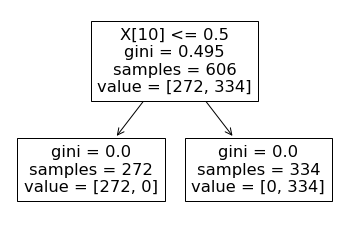

In [ ]:
# ===== VISUALISASI TREE =====
tree.plot_tree(clf_model)

In [ ]:
#load data test
df_test_lib = pd.read_excel('2_Python Library_Test Dataset.xlsx')
df_test_lib

,Age Cluster,ChestPainType,NEW RestingBP,NEW Triglycerides,NEW FastingBS,RestingECG,NEW MaxHR,ExerciseAngina,NEW Oldpeak,ST_Slope,HeartDisease
0,4,3,2,2,1,2,1,1,1,2,1
1,2,2,1,1,1,1,1,2,1,1,0
2,5,4,2,2,2,2,1,2,2,2,1
3,2,2,2,1,1,1,2,2,1,1,0
4,4,4,2,2,2,1,1,1,2,2,1
5,3,2,1,2,1,1,2,2,1,1,0
6,3,3,1,1,1,1,1,2,1,1,0
7,4,4,2,2,2,3,1,1,2,2,1
8,3,4,1,2,1,2,1,2,1,1,0
9,4,4,2,2,2,3,1,1,2,2,1


In [ ]:
# ===== MENGUBAH TEST DATAFRAME MENJADI ARRAY =====
df_test_lib = df_test_lib.to_numpy()
df_test_lib

array([[4, 3, 2, 2, 1, 2, 1, 1, 1, 2, 1],
       [2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0],
       [5, 4, 2, 2, 2, 2, 1, 2, 2, 2, 1],
       [2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 0],
       [4, 4, 2, 2, 2, 1, 1, 1, 2, 2, 1],
       [3, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0],
       [3, 3, 1, 1, 1, 1, 1, 2, 1, 1, 0],
       [4, 4, 2, 2, 2, 3, 1, 1, 2, 2, 1],
       [3, 4, 1, 2, 1, 2, 1, 2, 1, 1, 0],
       [4, 4, 2, 2, 2, 3, 1, 1, 2, 2, 1],
       [5, 4, 2, 2, 1, 1, 3, 2, 1, 1, 1],
       [3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0],
       [4, 2, 2, 1, 1, 3, 2, 2, 1, 1, 0],
       [4, 4, 2, 2, 2, 1, 1, 1, 1, 2, 1],
       [3, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0],
       [4, 4, 2, 3, 1, 1, 1, 1, 1, 2, 1],
       [4, 4, 2, 2, 2, 2, 1, 1, 1, 2, 1]])

In [ ]:
# ===== MEMPREDIKSI TEST DATA =====
result = clf_model.predict(df_test_lib)
result

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(df_test_lib[:,-1], result))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

